Spotify Music Analysis

In [17]:
#Data Set - Spotify 2010 - 2019 Top 100 Songs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
from pandas.plotting import parallel_coordinates
from pandas.plotting import lag_plot


df = pd.read_csv("Spotify 2010 - 2019 Top 100.csv")

In [2]:
df.columns

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top genre      1000 non-null   object
 3   year released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top year       1000 non-null   int64 
 16  artist type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


In [4]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [5]:
df.isnull().sum()

title            0
artist           0
top genre        0
year released    0
added            0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
top year         0
artist type      0
dtype: int64

In [6]:
df = df.drop(columns=['added'])
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo


In [7]:
df["top genre"].value_counts() # 132 top genres for categories 

dance pop           361
pop                  57
atl hip hop          39
art pop              37
hip hop              21
                   ... 
french shoegaze       1
new french touch      1
hip pop               1
australian psych      1
uk drill              1
Name: top genre, Length: 132, dtype: int64

In [19]:
#Use encoder to create values for the Categories in Top Genre
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df['genre_cat']= ""
df['genre_cat'] = ord_enc.fit_transform(df[["top genre"]])
df[['top genre', 'genre_cat']].head()


,top genre,genre_cat
0,dance pop,51.0
1,dance pop,51.0
2,pop soul,122.0
3,atl hip hop,14.0
4,atl hip hop,14.0


In [20]:
df

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,genre_cat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo,51.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo,51.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo,122.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo,14.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155,73,83,-4,12,45,313,1,22,86,2019,Solo,85.0
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80,50,55,-9,80,41,190,23,7,85,2019,Solo,85.0
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103,77,89,-5,9,46,177,1,7,68,2019,Solo,83.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138,58,53,-6,10,59,214,1,10,67,2019,Duo,4.0


In [16]:
#Use encoder to create values for the Categories in Artist type

ord_enc = OrdinalEncoder()
df['artist_cat']= ""
df['artist_cat'] = ord_enc.fit_transform(df[["artist type"]])
df[['artist type', 'artist_cat']].head()

,artist type,artist_cat
0,Duo,1.0
1,Duo,1.0
2,Solo,2.0
3,Solo,2.0
4,Solo,2.0


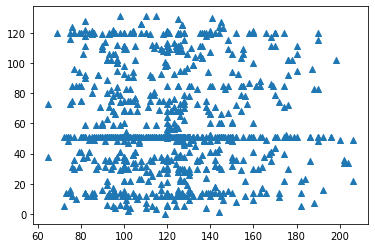

In [22]:
plt.scatter(df.bpm ,df.genre_cat,marker="^")
plt.show()

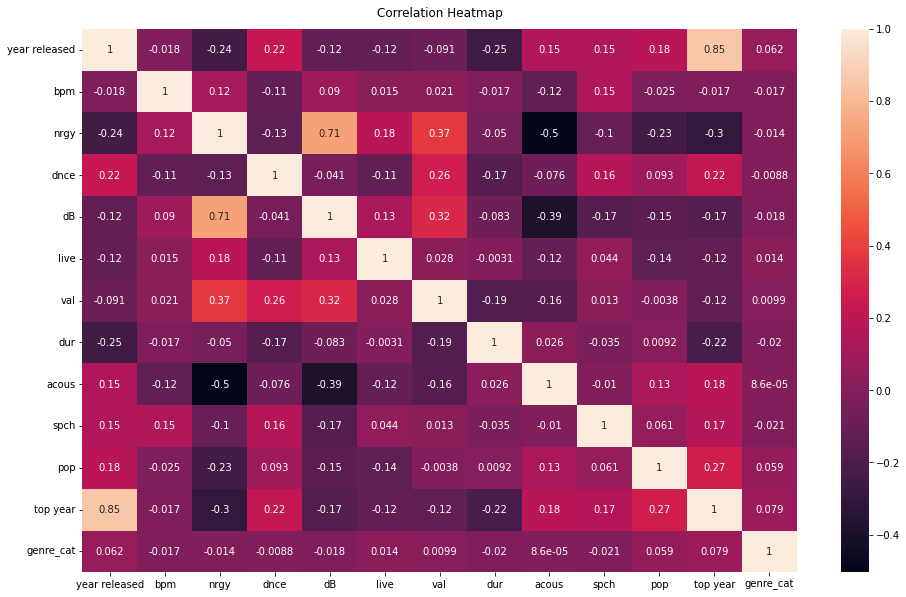

In [27]:
plt.figure(figsize=(16,10))

corr_heat = sns.heatmap(df.corr(), annot=True)
corr_heat.set_title("Correlation Heatmap", pad=12);
plt.show()